# Practicing PCA on a Face Dataset
In this exercise, we explore the application of the PCA on the LFW (Labeled Faces in the Wild) dataset which is available through the sklearn package.
# Submission
- There are three tasks for you.
- Report the results and answer the questions in the pdf file that you would submit along with your other solutions.
- Additionally, submit your code in the same Jupiter notebook format. (keep the overal format of the notebook unchanged)


# Packages
First of all, let's import the packages we need for this assignment.

In [5]:
# loading need libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from sklearn.datasets import fetch_lfw_people

# Dataset characteristics
Here we load the data set and take a look at the structure/properties of the dataset. This step is slow, but once the data set is loaded we do not need to repeat it.

In [6]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1)
n_samples, image_height, image_width = lfw_people.images.shape

X = lfw_people.data
# the label to predict is the id of the person
Y = lfw_people.target
Y_names = lfw_people.target_names
n_classes = Y_names.shape[0]

print("Dataset properties:")
print("\t Number of data points: %d" % X.shape[0])
print("\t Number of features: %d" % X.shape[1])
print("\t Number of classes: %d" % n_classes)
print("\t Width of each image: %d" % image_width)
print("\t Height of each image: %d" % image_height)

Dataset properties:
	 Number of data points: 1288
	 Number of features: 11750
	 Number of classes: 7
	 Width of each image: 94
	 Height of each image: 125


# Showing the pictures

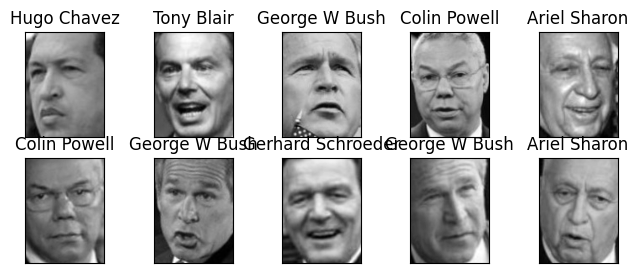

In [7]:
def plot_faces(images, labels, names, n_row, n_col):
    """Helper function to plot a gallery of portraits"""
    f = plt.figure(figsize=(8,3))
    for i in range(n_row * n_col):
        subfigure = f.add_subplot(n_row, n_col, i + 1)
        subfigure.imshow(images[i].reshape((image_height, image_width)), cmap=plt.cm.gray)
        subfigure.set_title(names[labels[i]])
        # Removing the axes
        plt.xticks(())
        plt.yticks(())
    plt.show()


plot_faces(X, Y, Y_names, 2, 5)

# Select "Tony Blair" class
Run the below code to select a specific class of faces.

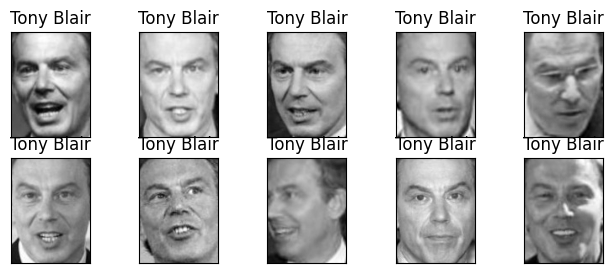

In [8]:
class_name_bush = 'Tony Blair'
class_indx_bush = list(Y_names).index(class_name_bush)
X_bush = X[Y==class_indx_bush,:]
Y_bush = Y[Y==class_indx_bush]

plot_faces(X_bush, Y_bush, Y_names, 2, 5)

# <font color="red">Task 1: Eigenfaces (10 points) </font>

The below code is supposed to generate the "average faces" as well as the first "eigen faces" for Tony Blair class. In this section you need to implement centralize_data() and pca_components() functions.

We use SVD factorization in order to implement PCA. In the following link you can find useful information of how to do so. It explains the connection between PCA and SVD. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca


You may check the video with link https://youtu.be/nbBvuuNVfco?si=SfJSE85fjMUMiboK for a detailed explanation of SVD.

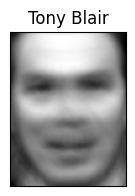

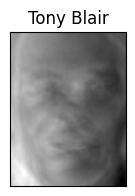

In [9]:
def centralize_data(images):
    # Implement this function. Subtract the data mean from datapoints.
    # Return centralized data and data mean
    # 5 points
    data_mean = np.mean(images,axis=0)
    c_data = images-data_mean
    return c_data, data_mean

def normalized_svd(images):
    # SVD is a matrix factorization which helps us to implement PCA.
    # Follow the given link above to understand how it works.
    # This function first centralizes the data points, and returns SVD factorization of the data set.
    XN, data_mean = centralize_data(images)
    U,S,Vt = svd(XN)
    return U,S,Vt,data_mean

def pca_components(Vt, n_components):
    # Implement this function.
    # Return first n components (first n principal directions/axes)
    # 5 points

    components = Vt[:n_components]

    return components

def average_image_class(images):
    class_average = np.mean(images, axis = 0)
    return class_average

def eigen_face_class(images):
    _,_,Vt,_ = normalized_svd(images)
    return pca_components(Vt, n_components=1)

def plot_class_representatives(images, class_name, aggregator):
    f = plt.figure(figsize=(2,2))
    subfigure = f.add_subplot(1,1,1)
    class_representative = aggregator(images)

    subfigure.imshow(class_representative.reshape((image_height, image_width)), cmap=plt.cm.gray)
    subfigure.set_title(class_name)
    # Removing the axes
    plt.xticks(())
    plt.yticks(())
    plt.show()

plot_class_representatives(X_bush, class_name_bush, aggregator=average_image_class)
plot_class_representatives(X_bush, class_name_bush, aggregator=eigen_face_class)

# <font color="red">Task 2: PCA visualization (10 points) </font>
It is hard to visualize and get a sense of highdimensional data. One approach to address this problem is dimensionality reduction, as we discussed in class. Here, we project the data into the 2D plane to be able to "see" what is going on. Implement the pca_transform() function.

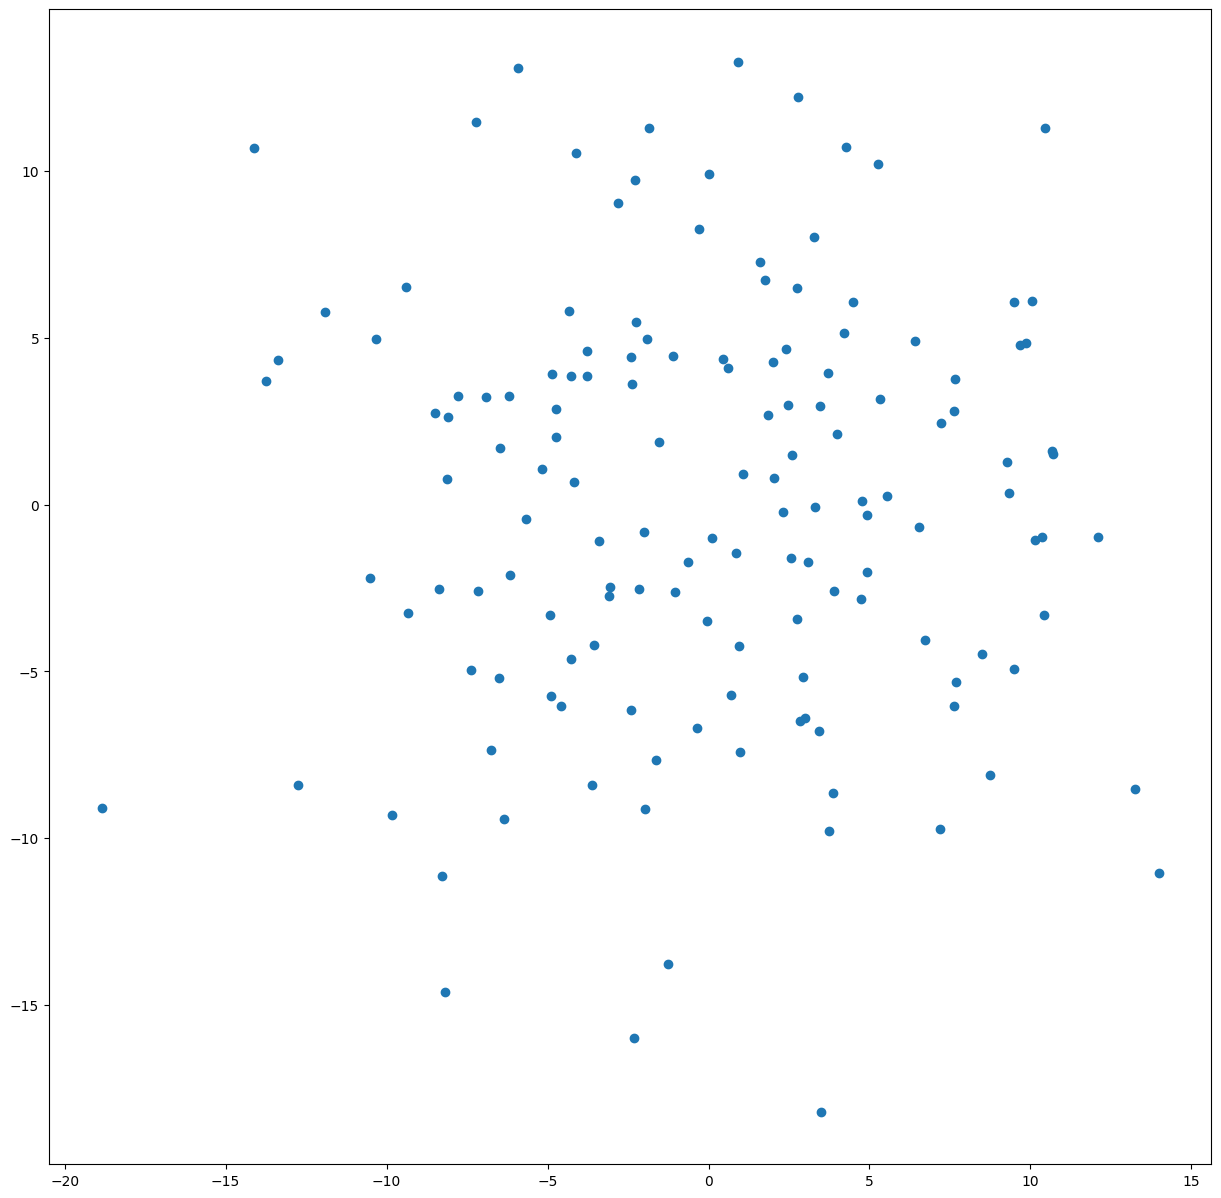

In [14]:
def pca_transform(U,S, n_components):
    # Implement this function.
    # Return transformed data using first n components.
    # Basically you have to return transformed 2D data
    # 10 points
    U_dr = U[:, :n_components]
    diagS = np.diag(S[:n_components])
    transformed_data = np.dot(U_dr, diagS)
    return transformed_data

U,S,Vt,data_mean = normalized_svd(X_bush)
T = pca_transform(U,S, n_components=2)
fig = plt.figure(figsize=(15,15))
plt.plot(T[:, 0], T[:, 1], 'o')

# <font color="red">Task 3: Reconstructing images (5 points)</font>
Some information is naturally lost when reducing the dimensionality of the data (just like the above scatter plot). In this part use the PCA (applied to the whole data set) to reduce the dimensionality of the data points to 2. Then, transform the 2D data points back to the original space to reconstruct the images. Implement pca_inverse_transform() function.

 - Plot the first 5 images in the data set and include it in your pdf report.

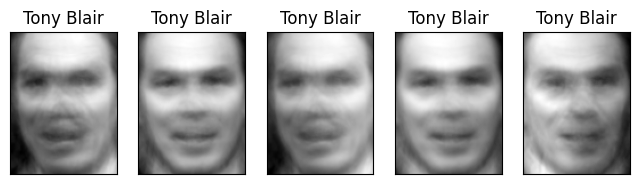

In [ ]:
def pca_inverse_transform(transformed_data, components, data_mean):
    # Implement this function.
    # Return inverse transformed data.
    # Previously you derived transformed data (into lower dimension). Now you have to transformed it back into original space.
    # 5 points

    reconstructed_data = np.dot(transformed_data, components)+data_mean

    return reconstructed_data

plot_faces(pca_inverse_transform(T, Vt[:2,:], data_mean),Y_bush, Y_names, 1, 5)

# <font color="red">Task 3: Average Reconstruction Error (20 points)</font>
Separate the image dataset into train (100 images) and test (rest of the data) datasets.
Train PCA with [2, 10, 30, 60, 100] components respectively. Reconstruction error is defined as $error=(\sum_{i=1}^n||x_i-reconstruct(pca(x_i))||^2_2)/n$, where $n$ is the number of images.

Plot average reconstruction error on training and testing data points with the following requirements:
  1. X-axis shows number of components.
  2. Y-axis shows reconstruction error.
  3. Draw two graphs, one for training and the other line for testing.

(15 points)

Explain the difference between the two graphs (5 points).

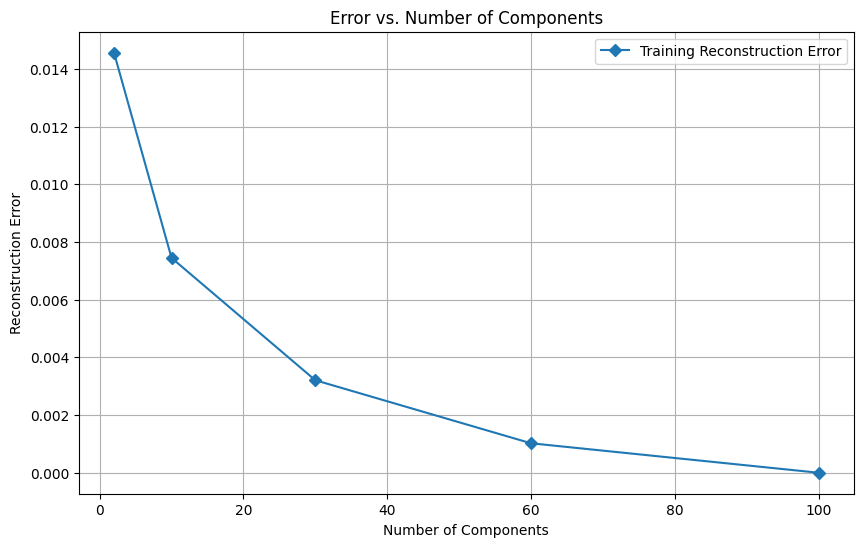

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=100, random_state=1)

n_components_list = [2, 10, 30, 60, 100]

errorTrain, errorTest = [], []

for i in n_components_list:
    pca = PCA(n_components=i)
    pca.fit(X_train)

    X_train_reconstructed = pca.inverse_transform(pca.transform(X_train))
    train_error = mean_squared_error(X_train, X_train_reconstructed)
    errorTrain.append(train_error)

    X_test_reconstructed = pca.inverse_transform(pca.transform(X_test))
    test_error = mean_squared_error(X_test, X_test_reconstructed)
    errorTest.append(test_error)

plt.figure(figsize=(10, 6))
plt.plot(n_components_list, errorTrain, label='Training Reconstruction Error', marker='D')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Error vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()

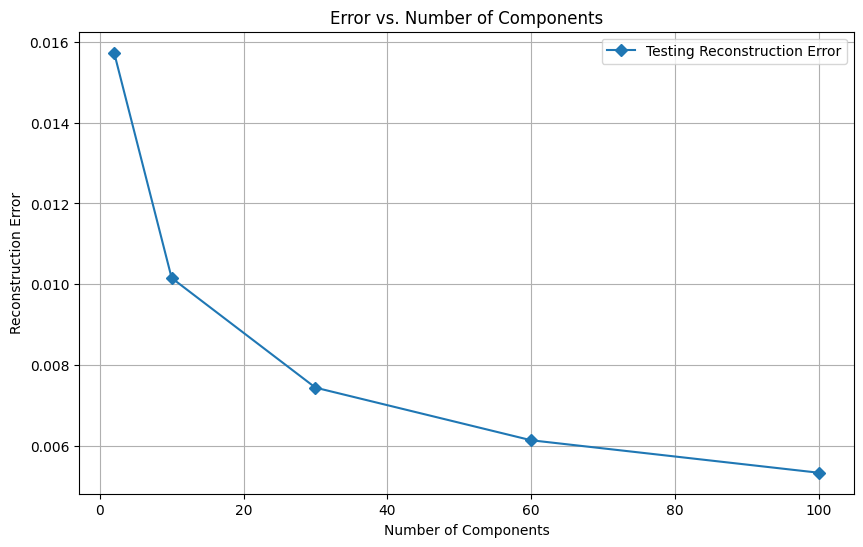

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=100, random_state=1)

n_components_list = [2, 10, 30, 60, 100]

errorTrain, errorTest = [], []

for i in n_components_list:
    pca = PCA(n_components=i)
    pca.fit(X_train)

    X_train_reconstructed = pca.inverse_transform(pca.transform(X_train))
    train_error = mean_squared_error(X_train, X_train_reconstructed)
    errorTrain.append(train_error)

    X_test_reconstructed = pca.inverse_transform(pca.transform(X_test))
    test_error = mean_squared_error(X_test, X_test_reconstructed)
    errorTest.append(test_error)

plt.figure(figsize=(10, 6))
plt.plot(n_components_list, errorTest, label='Testing Reconstruction Error', marker='D')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Error vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()